## Challenges

Please enhance the edge information of this image below. The file path is "flower.png"

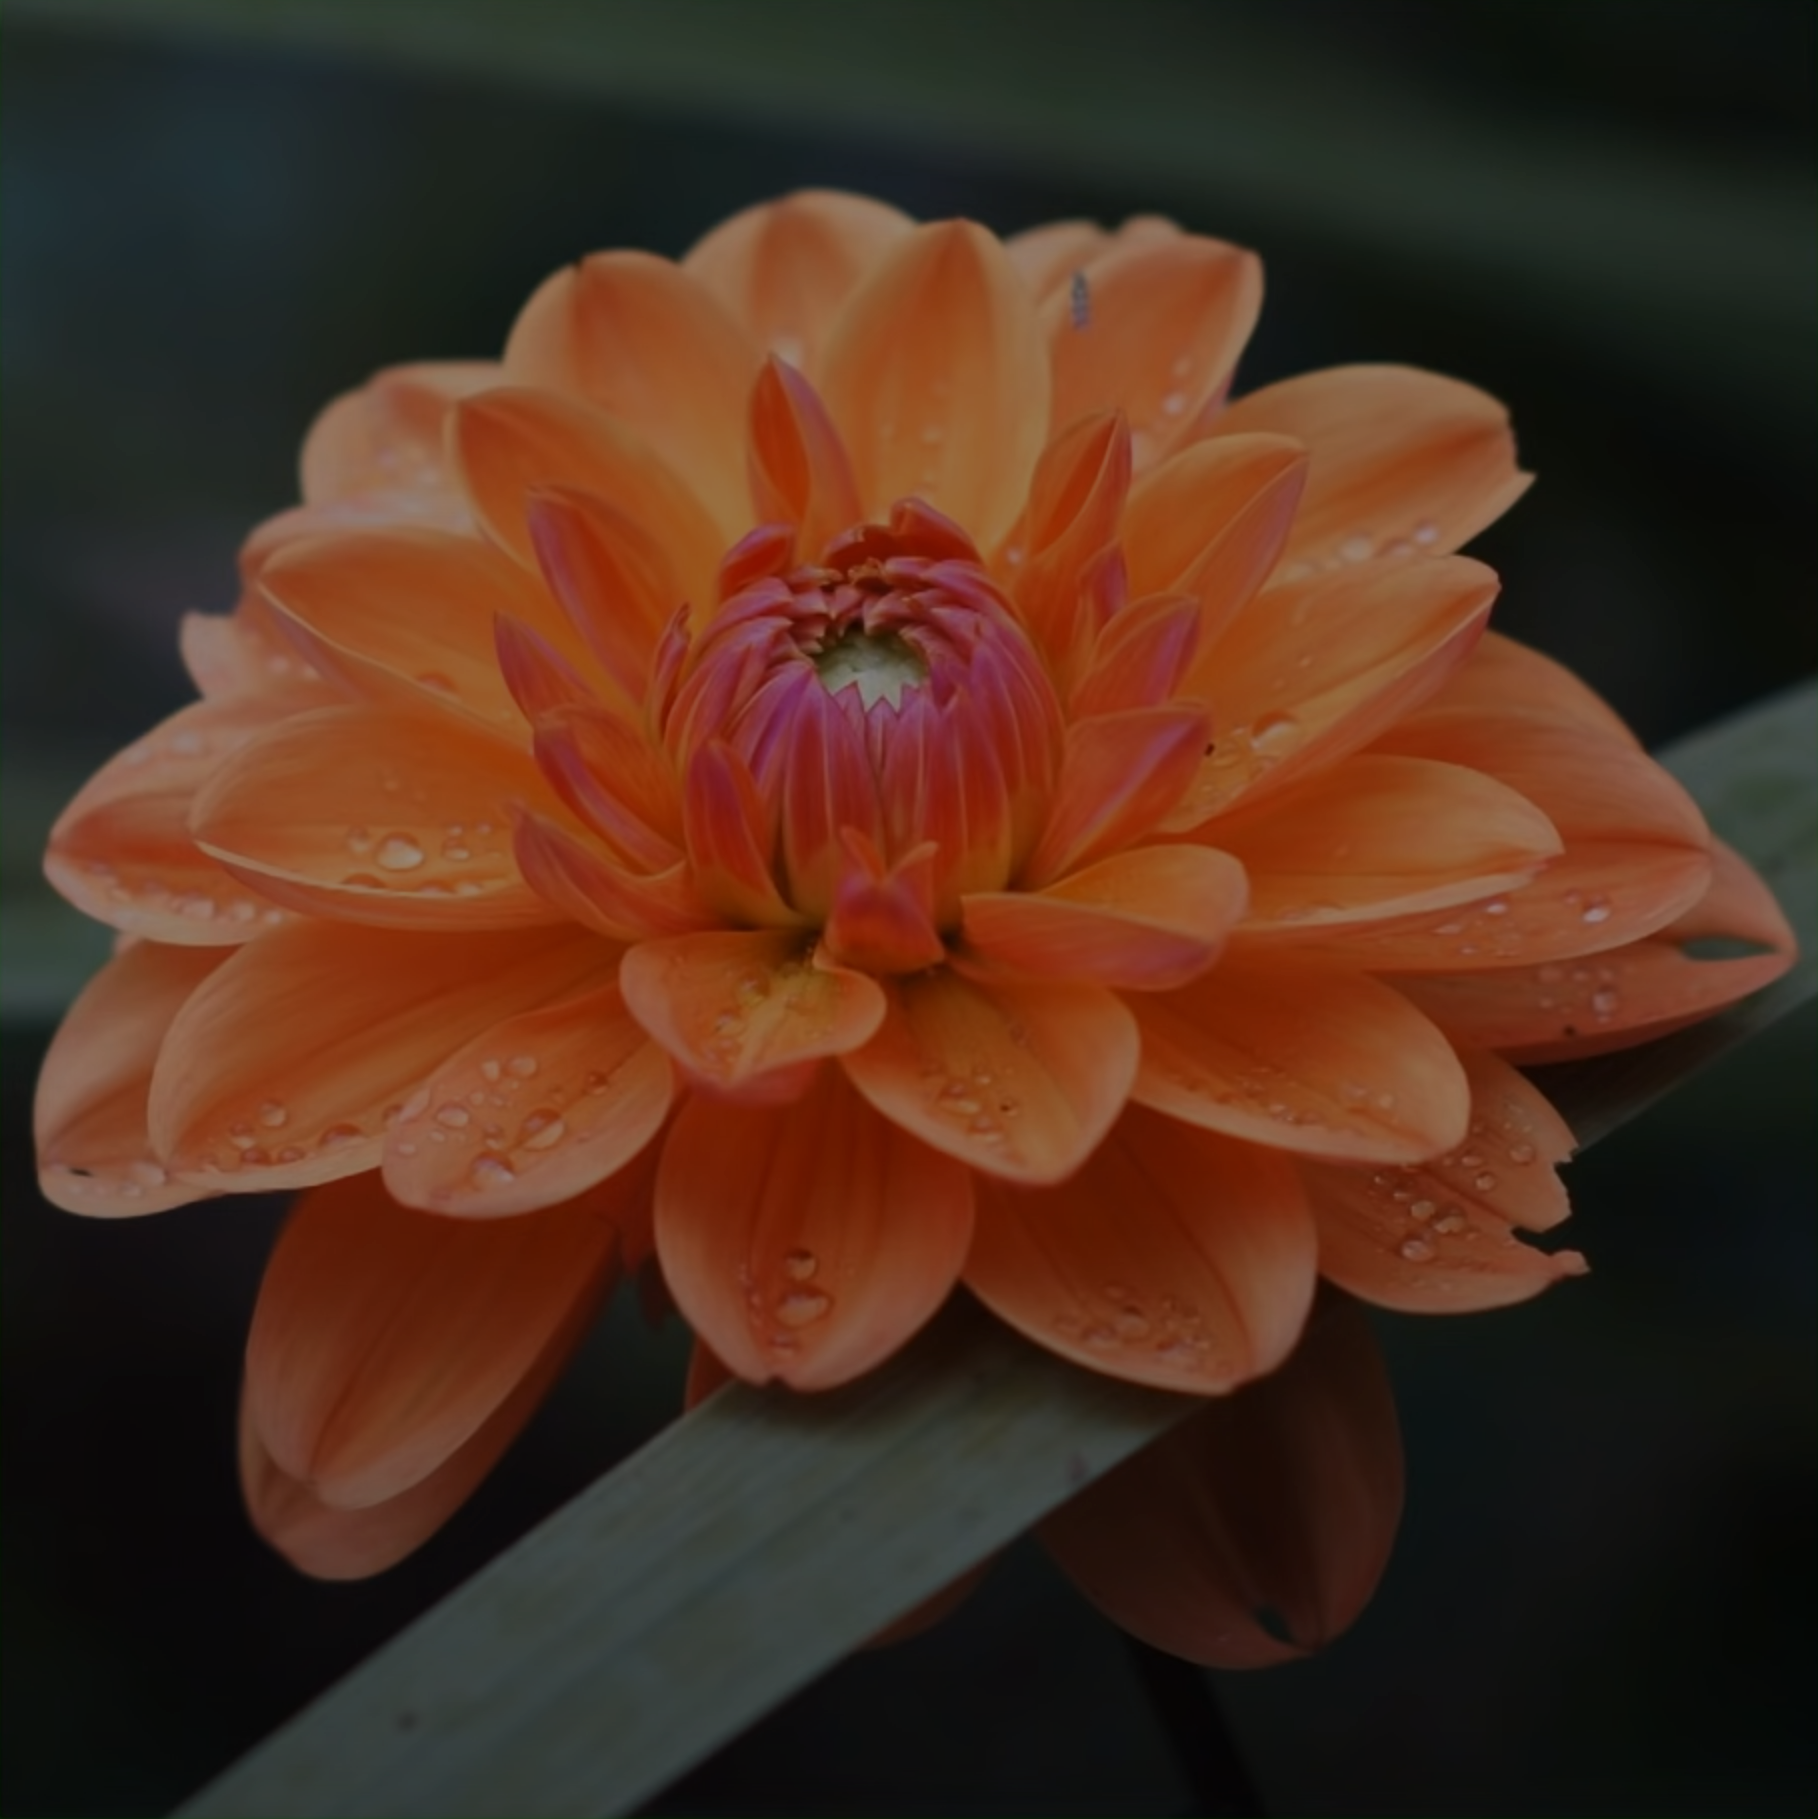

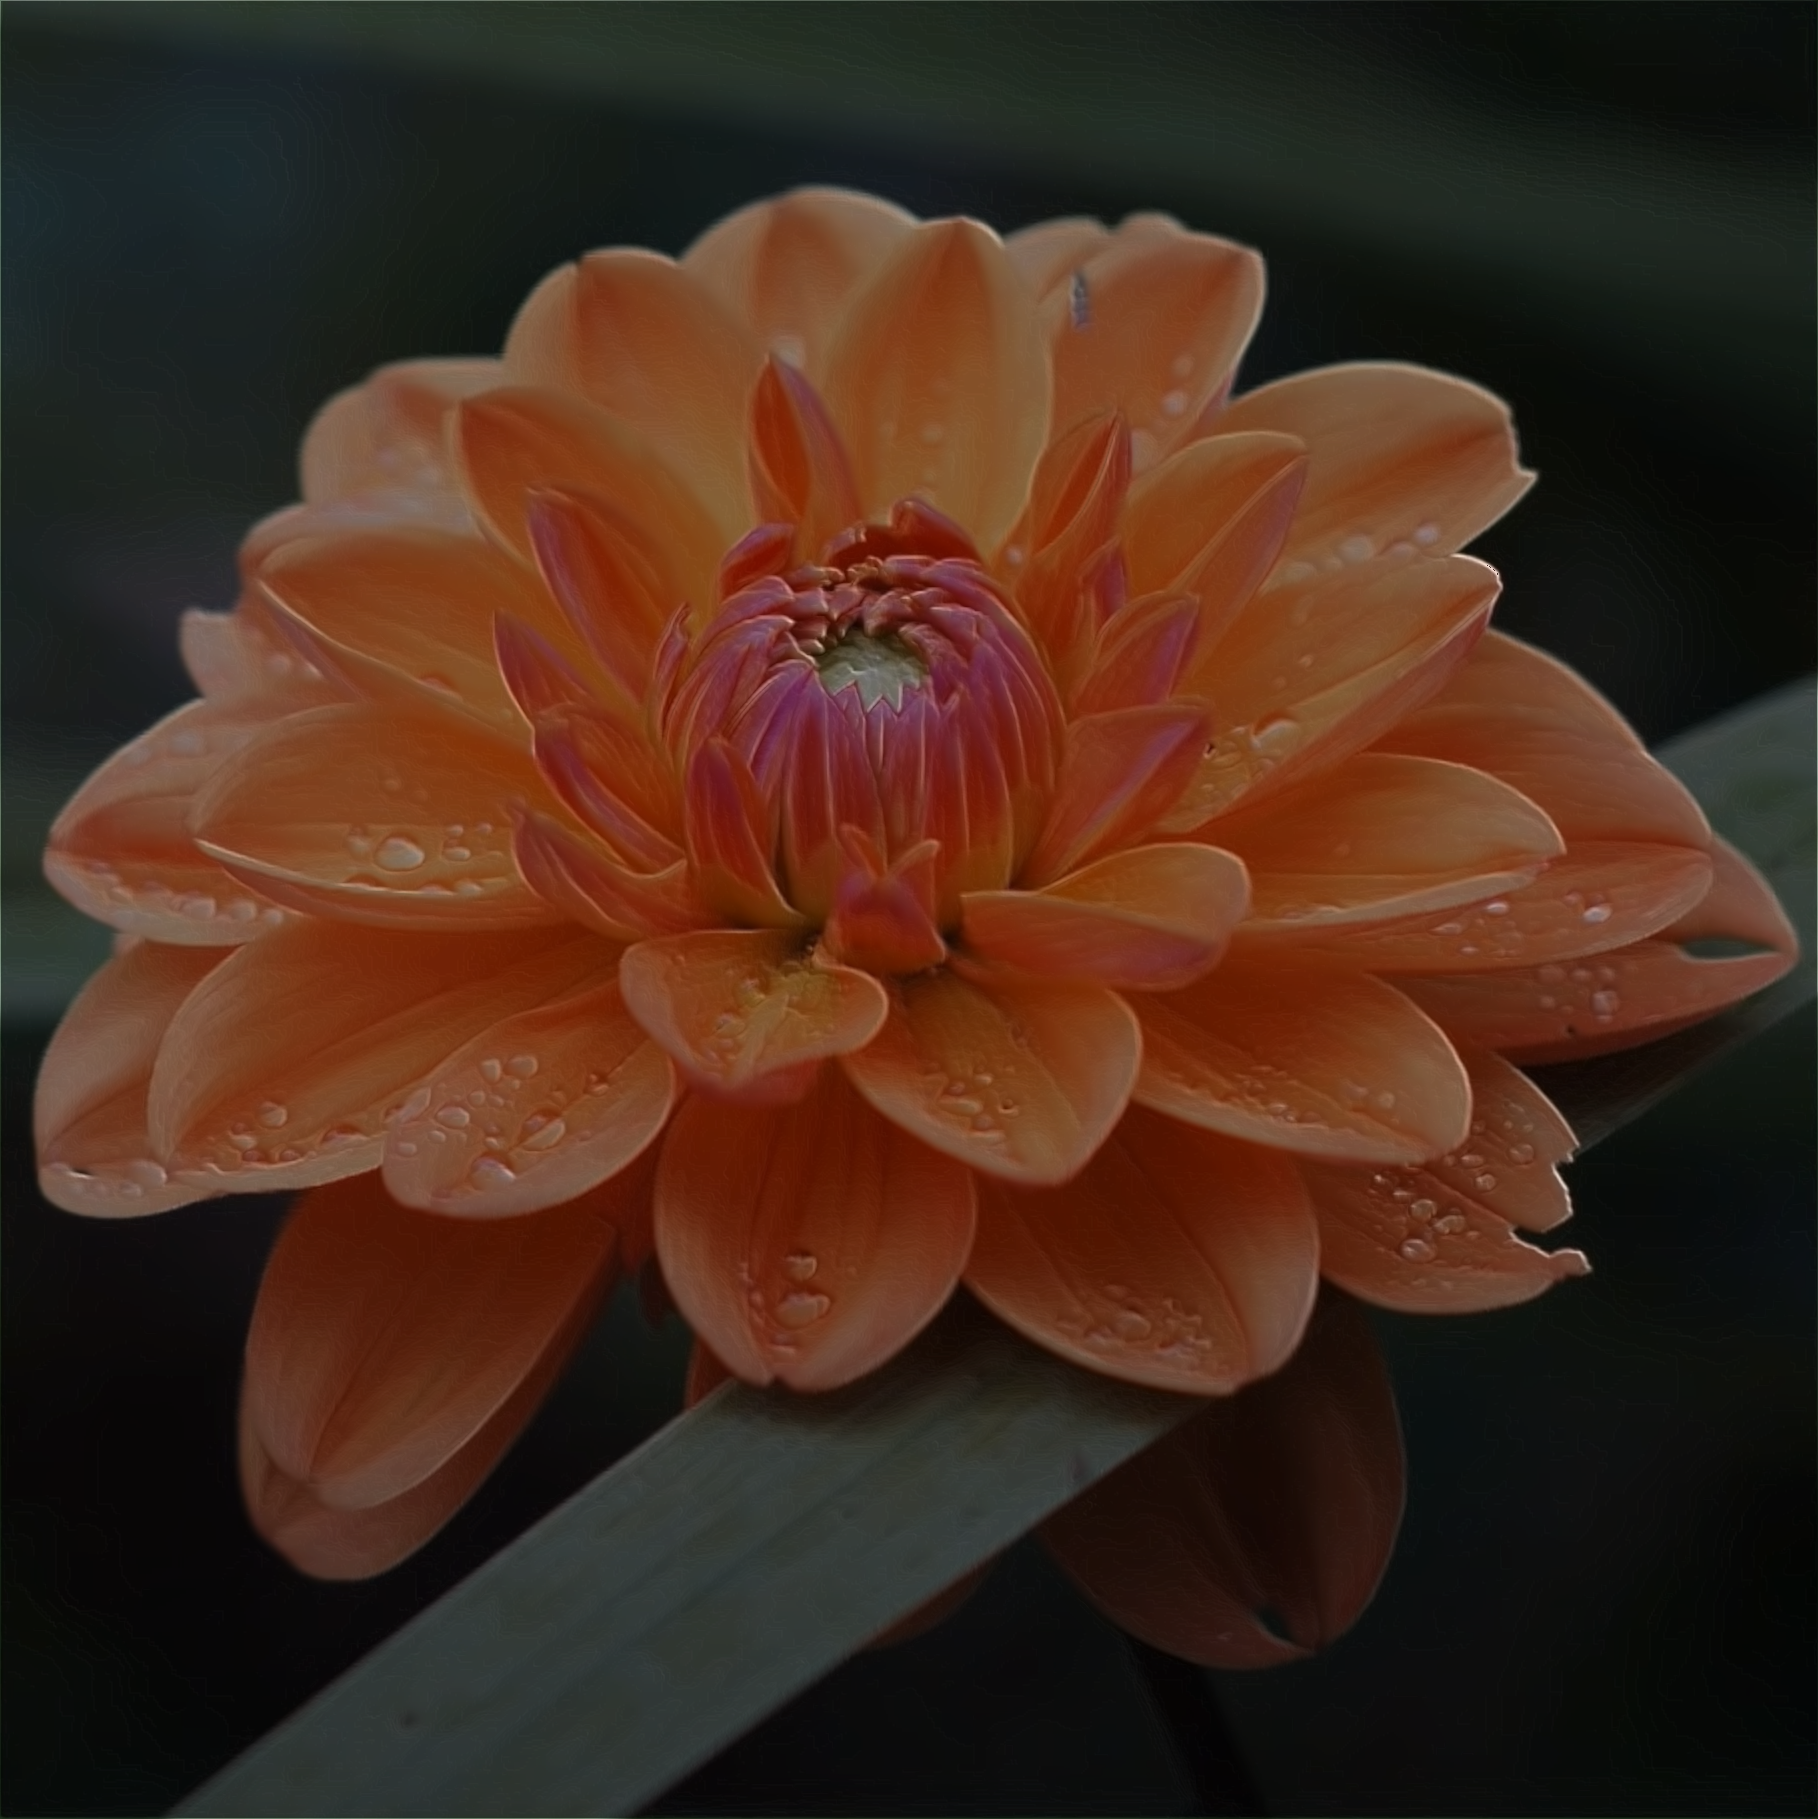

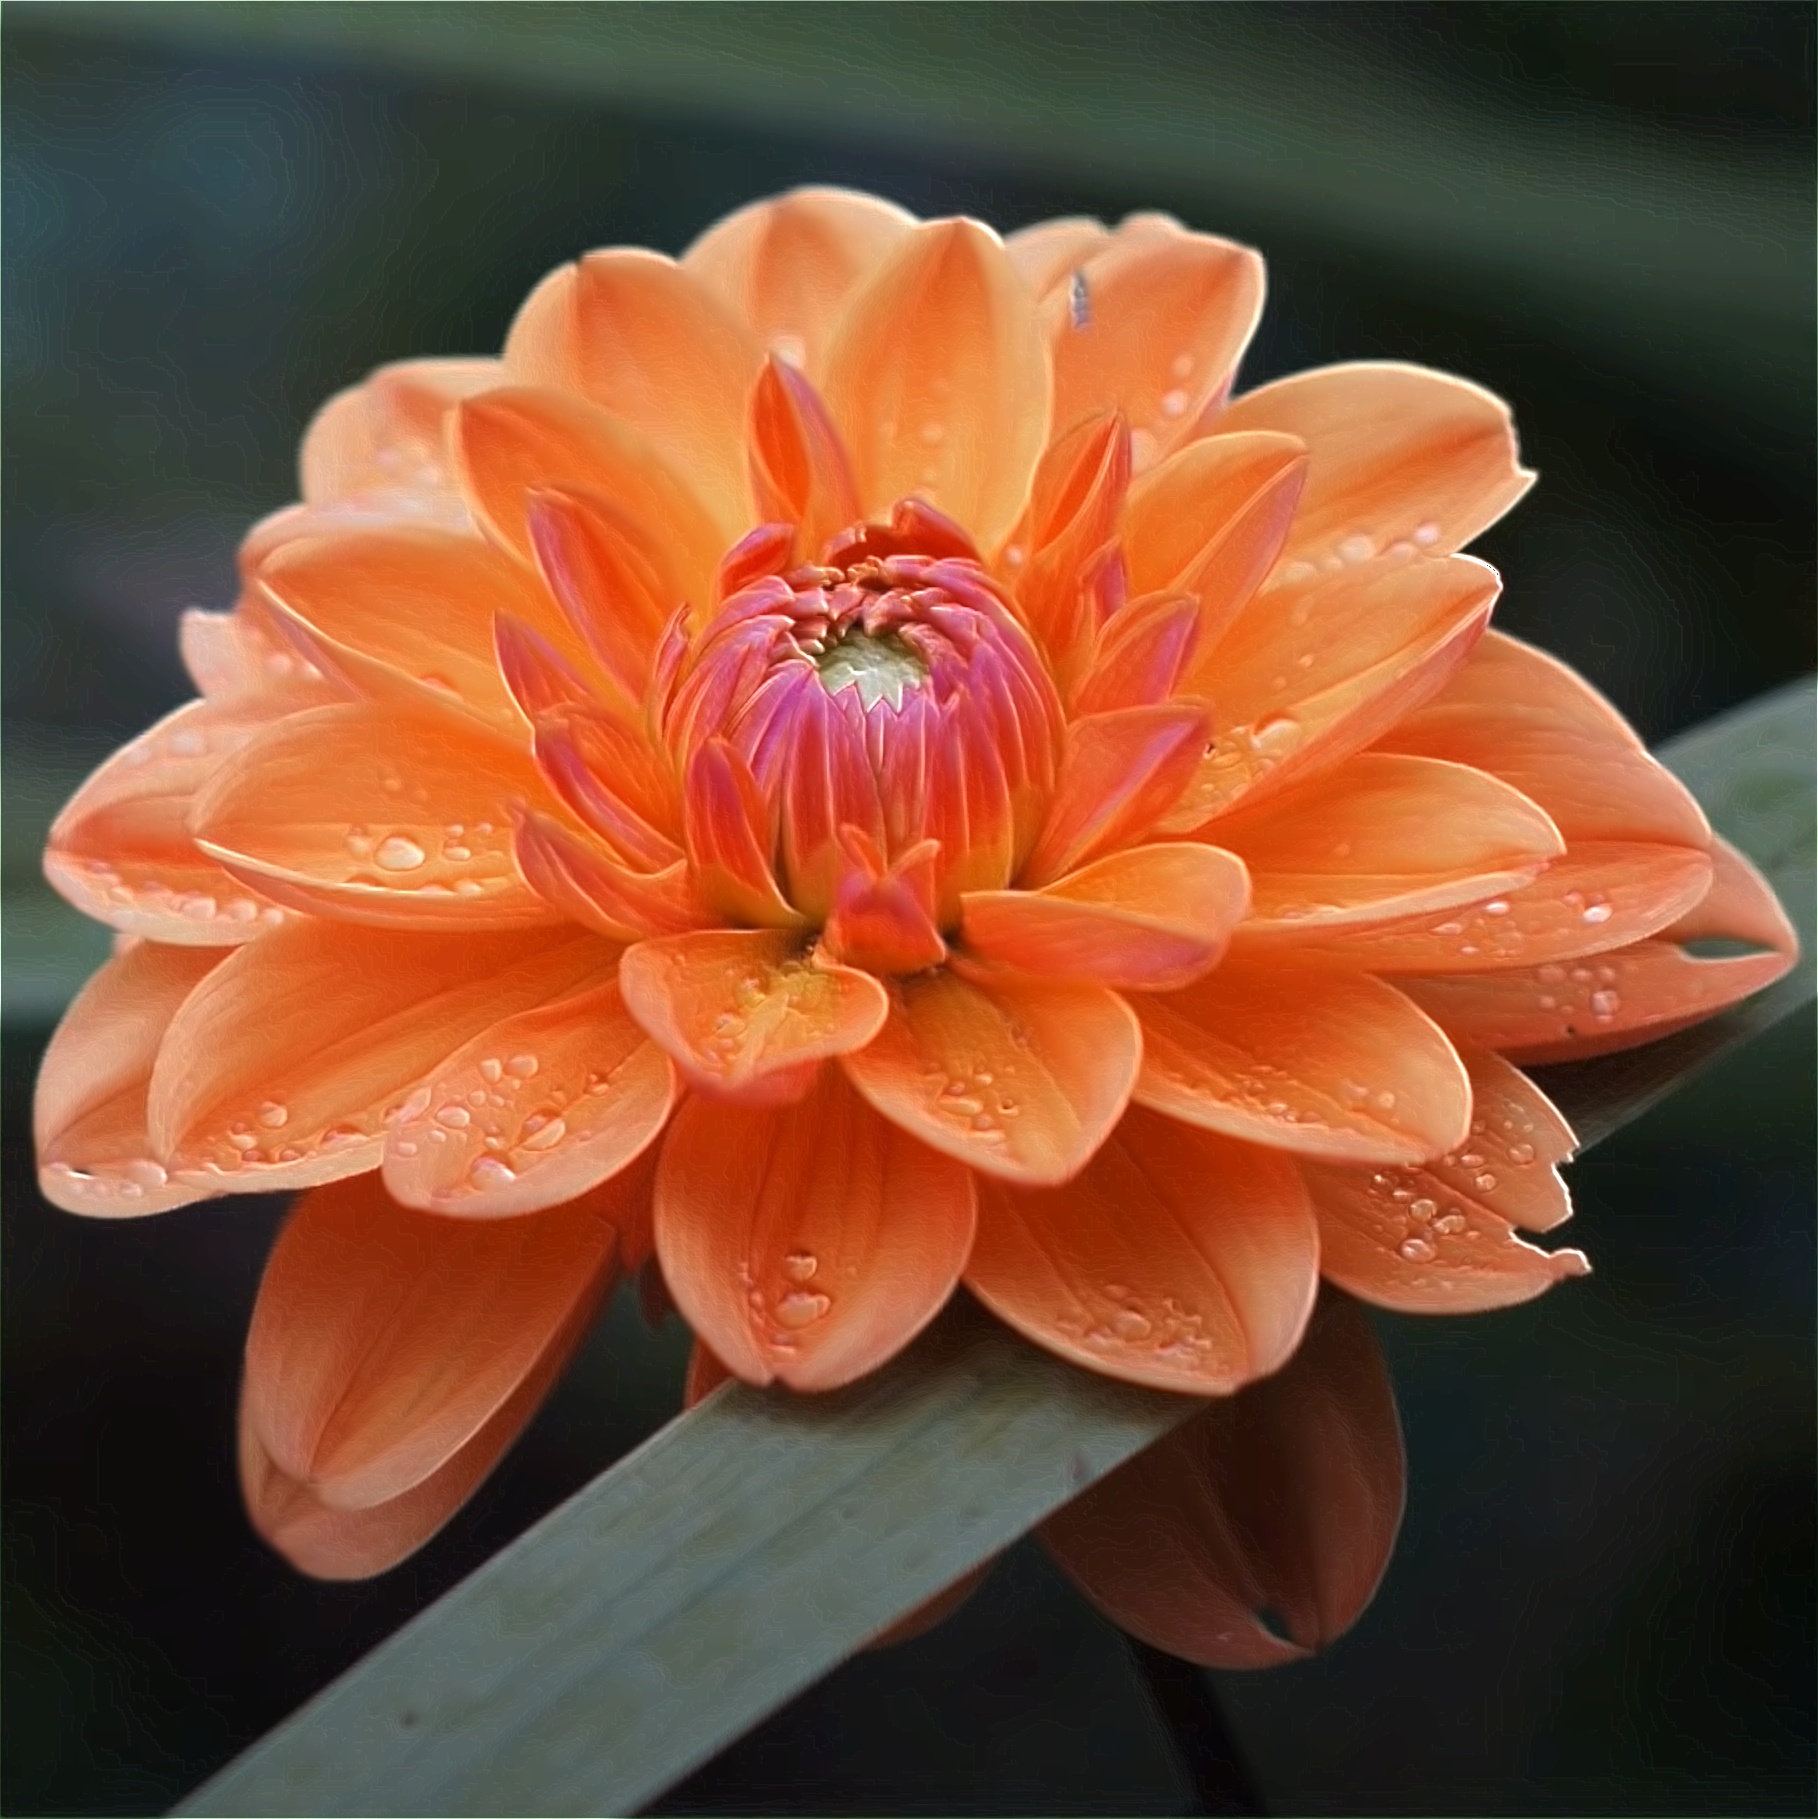

In [7]:
import numpy as np
from PIL import Image, ImageFilter
import cv2
img = Image.open("T3-flower.png")
display(img)
img_gray = img.convert("L")
# detect the edges using the argumented filter
image_edge_x = img_gray.filter(ImageFilter.Kernel((3, 3), (1, 0, -1, 2, 0,
                                          -2, 1, 0, -1), 1, 0))
image_edge_y = img_gray.filter(ImageFilter.Kernel((3, 3), (1, 2, 1, 0, 0,
                                          0, -1, -2, -1), 1, 0))
img_edge = (np.array(image_edge_x) + np.array(image_edge_y)) / 2
# enhance the edges
processed_img = cv2.merge((img_edge, img_edge, img_edge)) * 1.5 + np.array(img) 
processed_img = processed_img / processed_img.max() * 255
processed_img = processed_img.astype(np.uint8)
display(Image.fromarray(processed_img))
# brighten the image
brightened_img = cv2.convertScaleAbs(processed_img, alpha=1.8, beta=0)
display(Image.fromarray(brightened_img))
Image.fromarray(brightened_img).save("T3-enhanced_flower.png")

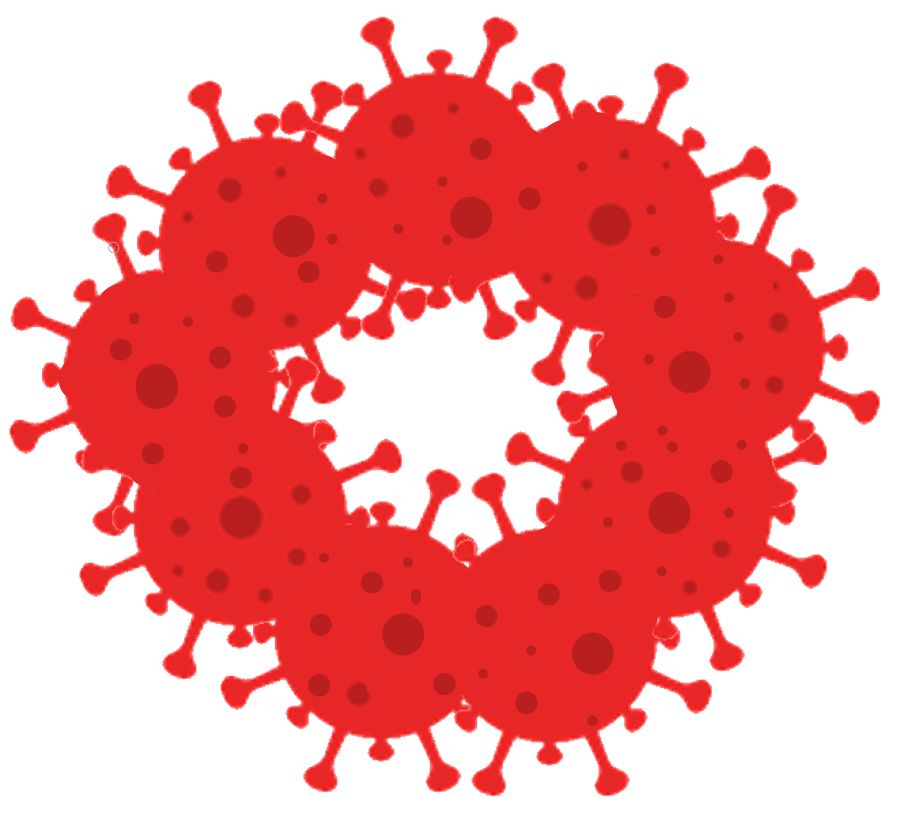

(823, 920)


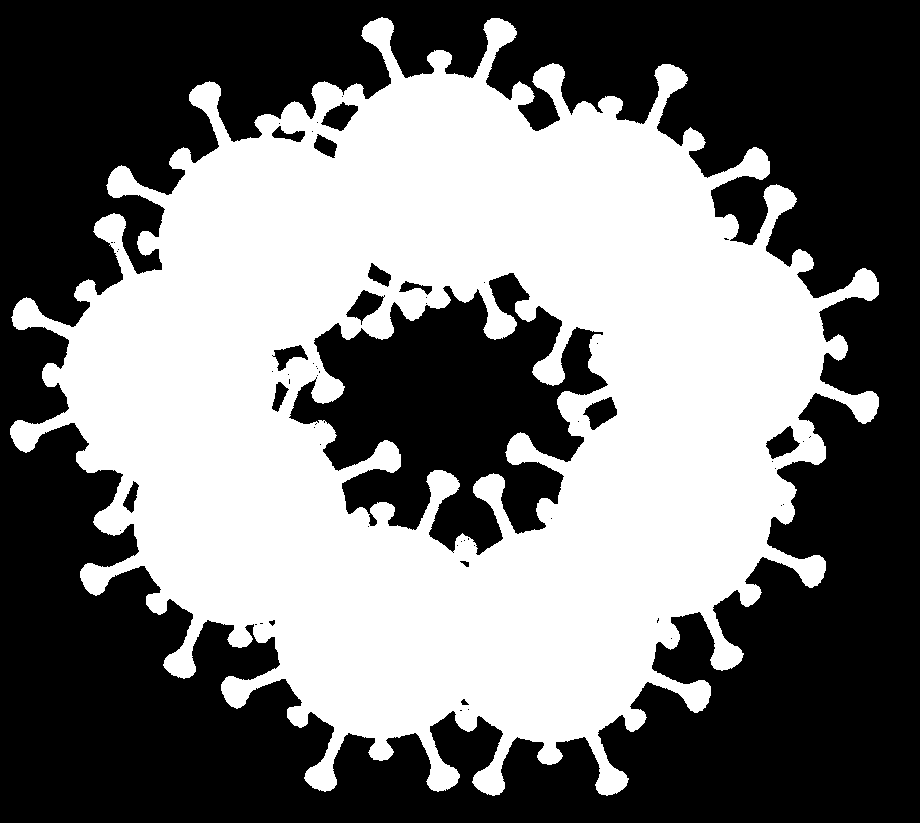

In [8]:
import cv2
from PIL import Image
import numpy as np

# load the image containing coronavirus
np_virus=cv2.imread("T3-coronvirus_challenge.PNG")
#cv2 images are stored in BGR order, we need to convert the order before disaply
display(Image.fromarray(cv2.cvtColor(np_virus, cv2.COLOR_BGR2RGB))) 
# convert to grey image
img_vir_grey = cv2.cvtColor(np_virus, cv2.COLOR_BGR2GRAY)
# get the binary image after thresholding
ret,img_th = cv2.threshold(img_vir_grey,160,255,cv2.THRESH_BINARY)
print(img_th.shape)
bw_img=Image.fromarray(255-img_th)
display(bw_img)

In [9]:
SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
print(SE)

[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


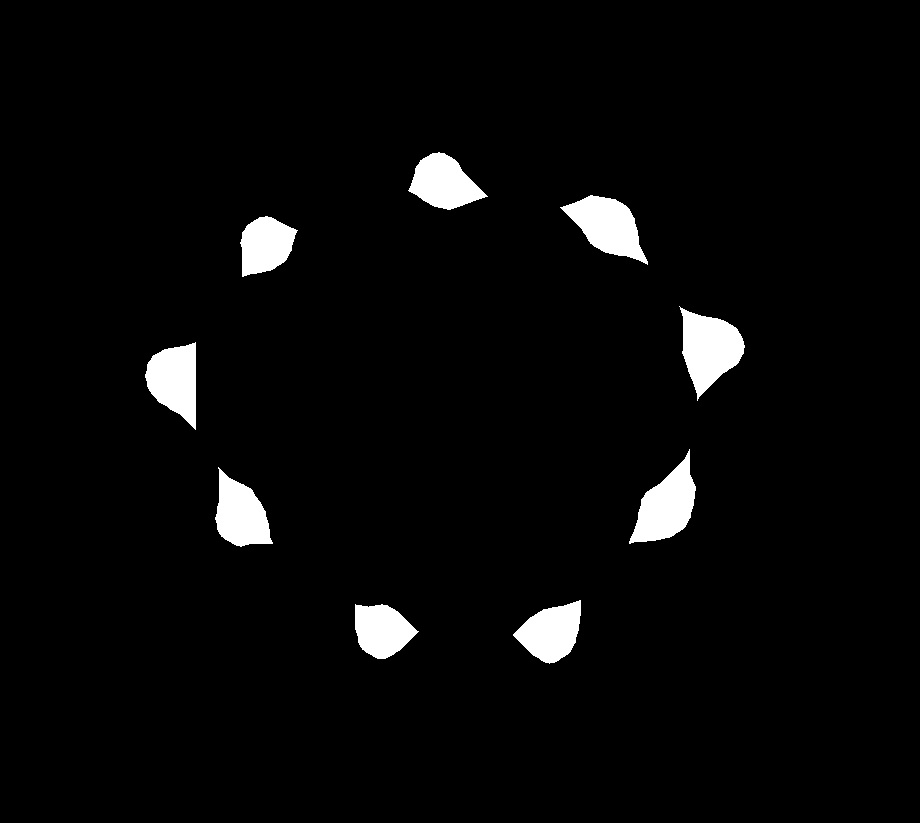

In [10]:
SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(40,40))
img_erosion = cv2.erode(255-img_th,SE,iterations = 4)
bw_img=Image.fromarray(img_erosion)
display(bw_img)

F:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


9


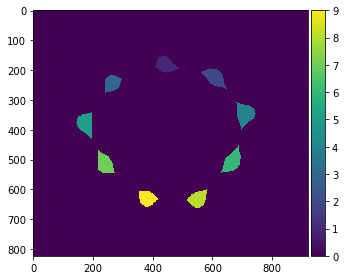

In [11]:
from skimage.measure import label,regionprops
from skimage import io
np_labeled=label(img_erosion)
io.imshow(np_labeled)
regions = regionprops(np_labeled)
print(len(regions))

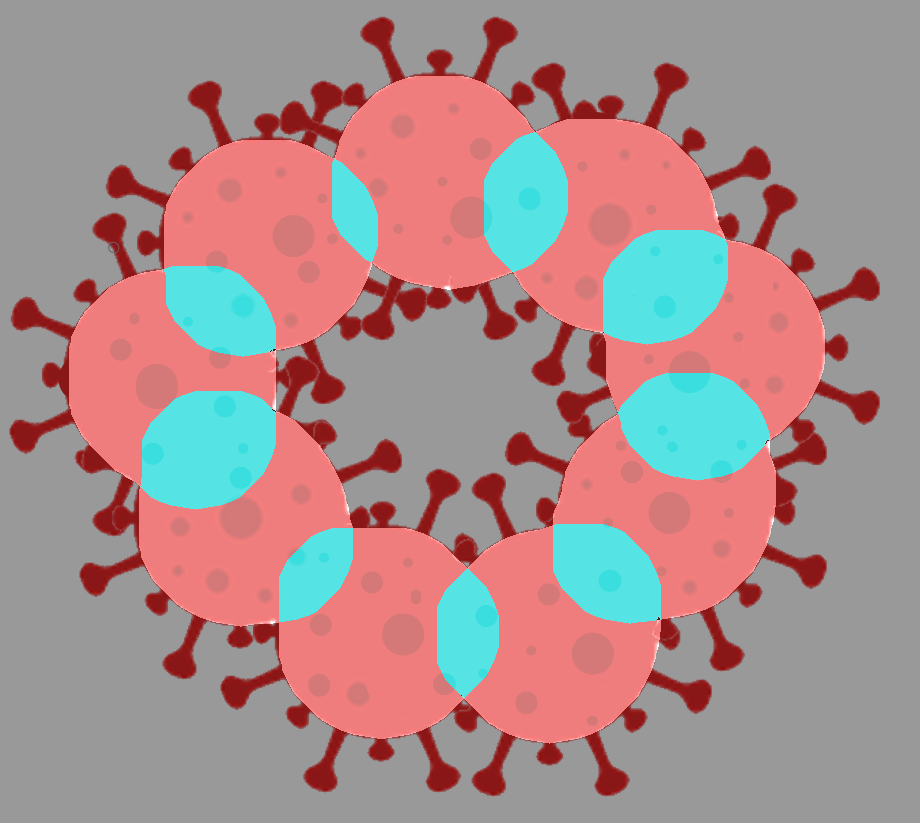

In [12]:
np_regions=[]
np_masks=[]
merged_mask=np.zeros(np_labeled.shape)
for index in range(1, np_labeled.max()+1):
    np_regions.append((((np_labeled==index)+0)*255).astype(np.uint8))
    np_dilation = cv2.dilate(np_regions[-1],SE,iterations = 4)
    np_masks.append(np_dilation)
    merged_mask=merged_mask+np_dilation
    #display(Image.fromarray(np_dilation))

np_merge=cv2.merge((merged_mask,merged_mask,merged_mask))*0.4+np_virus*0.6
display(Image.fromarray(cv2.cvtColor(np_merge.astype(np.uint8), cv2.COLOR_BGR2RGB)))